# Bosques aleatorios

En este notebook veremos los bosques aleatorios compuestos de múltiples arboles de desición

In [1]:
import pandas as pd
personas = pd.read_csv("ingresos.csv")

In [7]:
personas.sample(frac=2/3, replace=True)

,edad,estudio,genero,tipo_trabajo,horas,ingreso
62,28,13,0,0,35,0
97,46,3,0,0,40,0
50,20,10,0,0,40,0
54,53,1,1,0,40,0
60,26,10,1,0,52,1
...,...,...,...,...,...,...
40,59,13,1,0,40,1
11,31,10,1,0,40,0
71,25,5,1,0,40,0
49,71,9,1,0,45,1


In [14]:
from random import sample
print(personas.columns[:-1], "\n")
print(sample(set(personas.columns[:-1]), 3))


Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['tipo_trabajo', 'estudio', 'genero']


<ipython-input-14-87b44707c5f0>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(sample(set(personas.columns[:-1]), 3))


In [16]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(n_estimators=100,
                                criterion="gini",
                                max_features="sqrt",
                                bootstrap=True,
                                max_samples=2/3,
                                oob_score=True)
bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values)
print(bosque.predict([[50, 16, 1, 1, 40]]))
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values))
print(bosque.oob_score_)

[1]
0.98
0.79


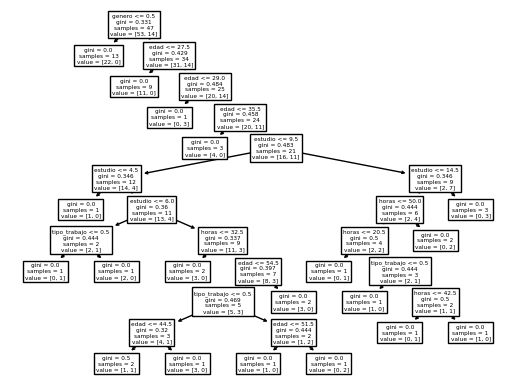

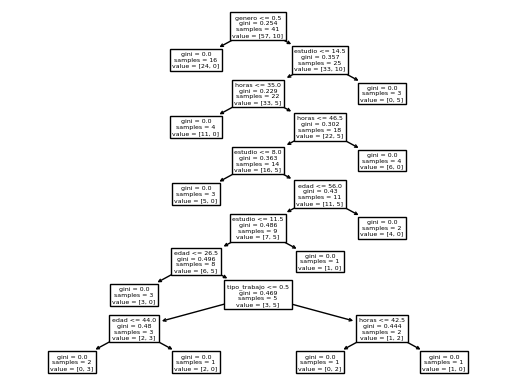

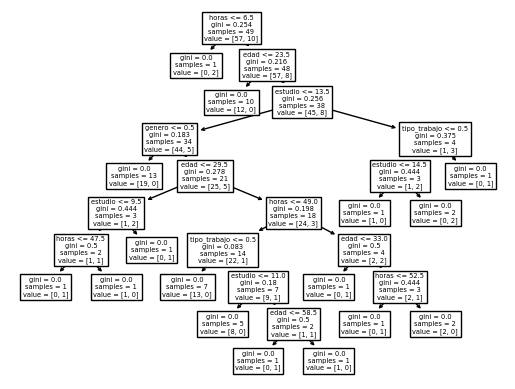

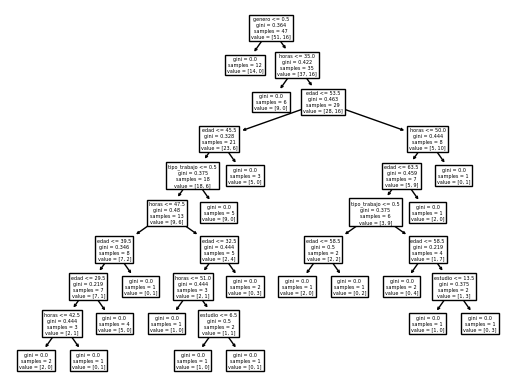

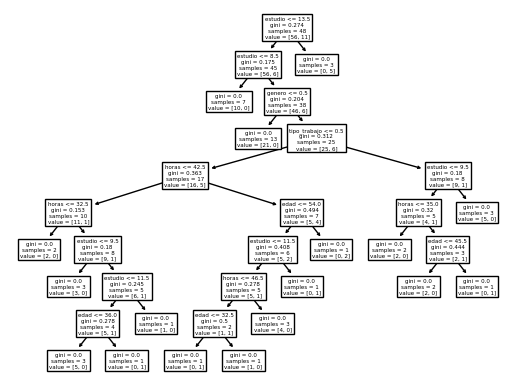

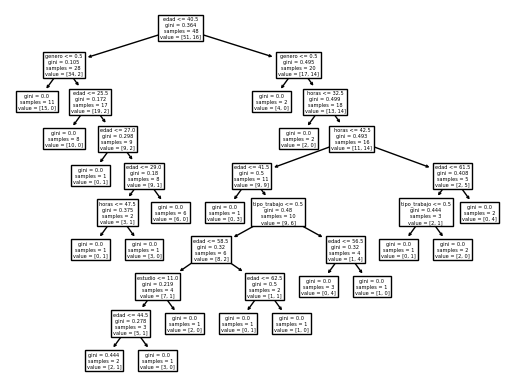

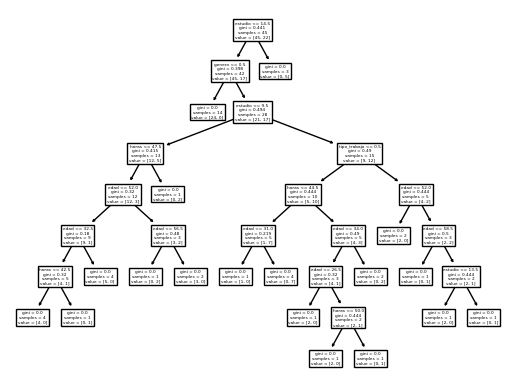

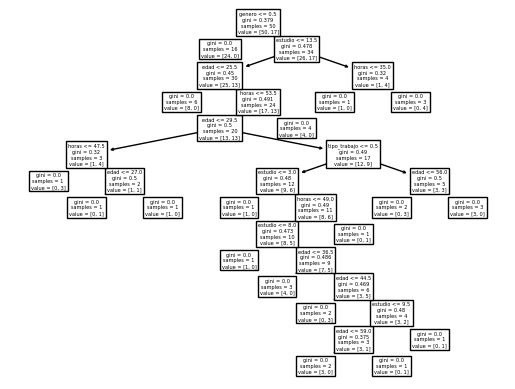

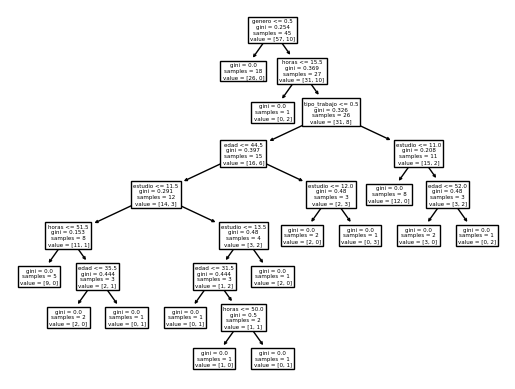

KeyboardInterrupt: 

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
  tree.plot_tree(arbol, feature_names=personas.columns[:-1])
  plt.show()